In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import csv
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

In [2]:
#apptrain=pd.read_csv("application_train.csv")
apptrain=pd.read_csv("modedapptrain.csv")
bureau=pd.read_csv("bureau.csv")
bbal=pd.read_csv("bureau_balance.csv")
ccbal=pd.read_csv("credit_card_balance.csv")
innpay=pd.read_csv("installments_payments.csv")
POS=pd.read_csv("POS_CASH_balance.csv")
old=pd.read_csv("previous_application.csv")

In [3]:
apptrain.drop("Unnamed: 0",axis=1,inplace=True)

In [30]:
'''apptrain["Gender"]=""
apptrain["OwnCar"]=""
apptrain["OwnRealty"]=""'''

In [31]:
'''for row_index,row in apptrain.iterrows():
    if row["CODE_GENDER"]=='M':
        apptrain.loc[row_index,"Gender"]=1
    elif row["CODE_GENDER"]=='F':
        apptrain.loc[row_index,"Gender"]=0'''

In [32]:
'''for row_index,row in apptrain.iterrows():
    if row["FLAG_OWN_CAR"]=='Y':
        apptrain.loc[row_index,"OwnCar"]=1
    elif row["FLAG_OWN_CAR"]=='N':
        apptrain.loc[row_index,"OwnCar"]=0'''

In [33]:
'''for row_index,row in apptrain.iterrows():
    if row["FLAG_OWN_REALTY"]=='Y':
        apptrain.loc[row_index,"OwnRealty"]=1
    elif row["FLAG_OWN_REALTY"]=='N':
        apptrain.loc[row_index,"OwnRealty"]=0'''

In [34]:
#apptrain.to_csv('modedapptrain.csv',sep=',',encoding='utf-8')

In [ ]:
#sns.heatmap(apptrain.iloc[1:].isnull(),vmin=0,vmax=2,xticklabels=True,yticklabels=True)

In [ ]:
sns.heatmap(apptrain.head(200000).isnull(),vmin=0,vmax=2)

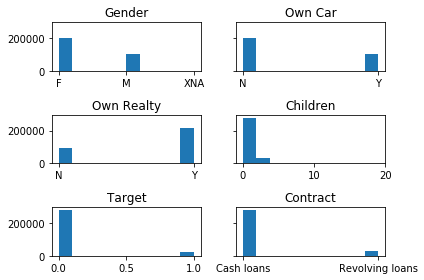

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0.hist(apptrain["CODE_GENDER"], label="Gender")
ax0.set_title('Gender')
ax1.hist(apptrain["FLAG_OWN_CAR"], label="Own Car")
ax1.set_title('Own Car')
ax2.hist(apptrain["FLAG_OWN_REALTY"], label="Own Realty")
ax2.set_title('Own Realty')
ax3.hist(apptrain["CNT_CHILDREN"], label="Children")
ax3.set_title('Children')
ax4.hist(apptrain["TARGET"], label="Target")
ax4.set_title('Target')
ax5.hist(apptrain["NAME_CONTRACT_TYPE"], label="Contract")
ax5.set_title('Contract')
fig.tight_layout()
plt.show()

In [5]:
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [6]:
old.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


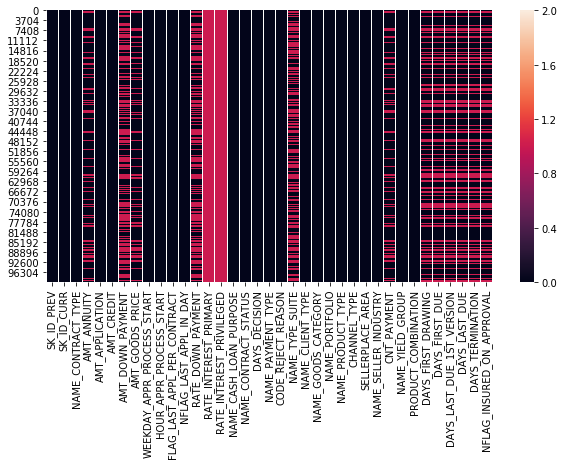

In [64]:
fig=plt.figure(figsize=(10, 5))
sns.heatmap(old.head(100000).isnull(),vmin=0,vmax=2)

In [7]:
old.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [13]:
type(old.count())

pandas.core.series.Series

In [10]:
def splitFrame(df,n):
    count=apptrain.shape[0]
    limit=int(count/n)+int(count%n)
    for l in limit:
        

NameError: name 'baptrain' is not defined

# Rough Work

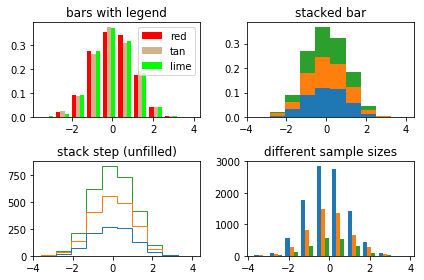

In [12]:
np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [69]:
count=apptrain.shape[0]


In [88]:
print(count/100)
print(count%100)

3075.11
11


In [84]:
limit=int(count/100)+int(count%100)

In [85]:
limit

3086

In [21]:
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [15]:
apptrain[10:20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1
12,100016,0,Cash loans,F,N,Y,0,67500.000,80865.0,5881.5,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
13,100017,0,Cash loans,M,Y,N,1,225000.000,918468.0,28966.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0
14,100018,0,Cash loans,F,N,Y,0,189000.000,773680.5,32778.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
15,100019,0,Cash loans,M,Y,Y,0,157500.000,299772.0,20160.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
16,100020,0,Cash loans,M,N,N,0,108000.000,509602.5,26149.5,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
17,100021,0,Revolving loans,F,N,Y,1,81000.000,270000.0,13500.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
18,100022,0,Revolving loans,F,N,Y,0,112500.000,157500.0,7875.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
19,100023,0,Cash loans,F,N,Y,1,90000.000,544491.0,17563.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1


In [27]:
def splitFrame(df,n):
    d = {}
    count=df.shape[0]
    parts=int(count/n)
    remains=int(count%n)
    limit=parts+remains
    fro=0
    for one in range(1,limit+1):
        to=one*n
        d[one] =pd.DataFrame()
        d[one]=df[fro:to]
        fro=to
    return d    

In [18]:
mydict={}

In [19]:
mydict

{}

In [28]:
mydict=splitFrame(apptrain,50000)

In [34]:
mydict[7]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
300000,447548,0,Cash loans,M,Y,Y,0,202500.0,545040.0,25537.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
300001,447549,0,Cash loans,F,N,Y,0,180000.0,729792.0,31050.0,...,0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0,1
300002,447550,0,Cash loans,M,Y,N,0,157500.0,942300.0,36643.5,...,0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1,0
300003,447551,0,Cash loans,M,Y,Y,2,360000.0,450000.0,48465.0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
300004,447552,0,Revolving loans,F,N,Y,0,76500.0,180000.0,9000.0,...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
300005,447553,0,Cash loans,F,N,Y,0,166500.0,521280.0,22216.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1
300006,447555,0,Cash loans,F,N,Y,0,157500.0,377370.0,29331.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1
300007,447556,0,Cash loans,F,N,N,1,202500.0,1327500.0,38943.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
300008,447557,0,Revolving loans,M,N,N,0,112500.0,337500.0,16875.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0
300009,447558,0,Cash loans,M,N,Y,1,112500.0,286704.0,24655.5,...,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0,1


In [26]:
for i in range(1,10+1):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [39]:
d = {}
df=apptrain
n=50000
count=df.shape[0]
parts=int(count/n)
print("parts"+ str(parts))
remains=int(count%n)
print("remains"+ str(remains))
limit=parts+remains
fro=0
to=0
print(limit)
for one in range(1,limit+1):
    print(one)
    to=one*n
    print(to)
    d[one] =pd.DataFrame()
    d[one]=df[fro:to]
    fro=to
    print(fro)
    print("********")
return d

parts6
remains7511
7517
1
50000
50000
********
2
100000
100000
********
3
150000
150000
********
4
200000
200000
********
5
250000
250000
********
6
300000
300000
********
7
350000
350000
********
8
400000
400000
********
9
450000
450000
********
10
500000
500000
********
11
550000
550000
********
12
600000
600000
********
13
650000
650000
********
14
700000
700000
********
15
750000
750000
********
16
800000
800000
********
17
850000
850000
********
18
900000
900000
********
19
950000
950000
********
20
1000000
1000000
********
21
1050000
1050000
********
22
1100000
1100000
********
23
1150000
1150000
********
24
1200000
1200000
********
25
1250000
1250000
********
26
1300000
1300000
********
27
1350000
1350000
********
28
1400000
1400000
********
29
1450000
1450000
********
30
1500000
1500000
********
31
1550000
1550000
********
32
1600000
1600000
********
33
1650000
1650000
********
34
1700000
1700000
********
35
1750000
1750000
********
36
1800000
1800000
********
37
1850000
185000

26100000
26100000
********
523
26150000
26150000
********
524
26200000
26200000
********
525
26250000
26250000
********
526
26300000
26300000
********
527
26350000
26350000
********
528
26400000
26400000
********
529
26450000
26450000
********
530
26500000
26500000
********
531
26550000
26550000
********
532
26600000
26600000
********
533
26650000
26650000
********
534
26700000
26700000
********
535
26750000
26750000
********
536
26800000
26800000
********
537
26850000
26850000
********
538
26900000
26900000
********
539
26950000
26950000
********
540
27000000
27000000
********
541
27050000
27050000
********
542
27100000
27100000
********
543
27150000
27150000
********
544
27200000
27200000
********
545
27250000
27250000
********
546
27300000
27300000
********
547
27350000
27350000
********
548
27400000
27400000
********
549
27450000
27450000
********
550
27500000
27500000
********
551
27550000
27550000
********
552
27600000
27600000
********
553
27650000
27650000
********
554
27700000

1022
51100000
51100000
********
1023
51150000
51150000
********
1024
51200000
51200000
********
1025
51250000
51250000
********
1026
51300000
51300000
********
1027
51350000
51350000
********
1028
51400000
51400000
********
1029
51450000
51450000
********
1030
51500000
51500000
********
1031
51550000
51550000
********
1032
51600000
51600000
********
1033
51650000
51650000
********
1034
51700000
51700000
********
1035
51750000
51750000
********
1036
51800000
51800000
********
1037
51850000
51850000
********
1038
51900000
51900000
********
1039
51950000
51950000
********
1040
52000000
52000000
********
1041
52050000
52050000
********
1042
52100000
52100000
********
1043
52150000
52150000
********
1044
52200000
52200000
********
1045
52250000
52250000
********
1046
52300000
52300000
********
1047
52350000
52350000
********
1048
52400000
52400000
********
1049
52450000
52450000
********
1050
52500000
52500000
********
1051
52550000
52550000
********
1052
52600000
52600000
********
1053
526

********
1522
76100000
76100000
********
1523
76150000
76150000
********
1524
76200000
76200000
********
1525
76250000
76250000
********
1526
76300000
76300000
********
1527
76350000
76350000
********
1528
76400000
76400000
********
1529
76450000
76450000
********
1530
76500000
76500000
********
1531
76550000
76550000
********
1532
76600000
76600000
********
1533
76650000
76650000
********
1534
76700000
76700000
********
1535
76750000
76750000
********
1536
76800000
76800000
********
1537
76850000
76850000
********
1538
76900000
76900000
********
1539
76950000
76950000
********
1540
77000000
77000000
********
1541
77050000
77050000
********
1542
77100000
77100000
********
1543
77150000
77150000
********
1544
77200000
77200000
********
1545
77250000
77250000
********
1546
77300000
77300000
********
1547
77350000
77350000
********
1548
77400000
77400000
********
1549
77450000
77450000
********
1550
77500000
77500000
********
1551
77550000
77550000
********
1552
77600000
77600000
********

101050000
********
2022
101100000
101100000
********
2023
101150000
101150000
********
2024
101200000
101200000
********
2025
101250000
101250000
********
2026
101300000
101300000
********
2027
101350000
101350000
********
2028
101400000
101400000
********
2029
101450000
101450000
********
2030
101500000
101500000
********
2031
101550000
101550000
********
2032
101600000
101600000
********
2033
101650000
101650000
********
2034
101700000
101700000
********
2035
101750000
101750000
********
2036
101800000
101800000
********
2037
101850000
101850000
********
2038
101900000
101900000
********
2039
101950000
101950000
********
2040
102000000
102000000
********
2041
102050000
102050000
********
2042
102100000
102100000
********
2043
102150000
102150000
********
2044
102200000
102200000
********
2045
102250000
102250000
********
2046
102300000
102300000
********
2047
102350000
102350000
********
2048
102400000
102400000
********
2049
102450000
102450000
********
2050
102500000
102500000
****

113550000
********
2272
113600000
113600000
********
2273
113650000
113650000
********
2274
113700000
113700000
********
2275
113750000
113750000
********
2276
113800000
113800000
********
2277
113850000
113850000
********
2278
113900000
113900000
********
2279
113950000
113950000
********
2280
114000000
114000000
********
2281
114050000
114050000
********
2282
114100000
114100000
********
2283
114150000
114150000
********
2284
114200000
114200000
********
2285
114250000
114250000
********
2286
114300000
114300000
********
2287
114350000
114350000
********
2288
114400000
114400000
********
2289
114450000
114450000
********
2290
114500000
114500000
********
2291
114550000
114550000
********
2292
114600000
114600000
********
2293
114650000
114650000
********
2294
114700000
114700000
********
2295
114750000
114750000
********
2296
114800000
114800000
********
2297
114850000
114850000
********
2298
114900000
114900000
********
2299
114950000
114950000
********
2300
115000000
115000000
****

132300000
132300000
********
2647
132350000
132350000
********
2648
132400000
132400000
********
2649
132450000
132450000
********
2650
132500000
132500000
********
2651
132550000
132550000
********
2652
132600000
132600000
********
2653
132650000
132650000
********
2654
132700000
132700000
********
2655
132750000
132750000
********
2656
132800000
132800000
********
2657
132850000
132850000
********
2658
132900000
132900000
********
2659
132950000
132950000
********
2660
133000000
133000000
********
2661
133050000
133050000
********
2662
133100000
133100000
********
2663
133150000
133150000
********
2664
133200000
133200000
********
2665
133250000
133250000
********
2666
133300000
133300000
********
2667
133350000
133350000
********
2668
133400000
133400000
********
2669
133450000
133450000
********
2670
133500000
133500000
********
2671
133550000
133550000
********
2672
133600000
133600000
********
2673
133650000
133650000
********
2674
133700000
133700000
********
2675
133750000
1337

2896
144800000
144800000
********
2897
144850000
144850000
********
2898
144900000
144900000
********
2899
144950000
144950000
********
2900
145000000
145000000
********
2901
145050000
145050000
********
2902
145100000
145100000
********
2903
145150000
145150000
********
2904
145200000
145200000
********
2905
145250000
145250000
********
2906
145300000
145300000
********
2907
145350000
145350000
********
2908
145400000
145400000
********
2909
145450000
145450000
********
2910
145500000
145500000
********
2911
145550000
145550000
********
2912
145600000
145600000
********
2913
145650000
145650000
********
2914
145700000
145700000
********
2915
145750000
145750000
********
2916
145800000
145800000
********
2917
145850000
145850000
********
2918
145900000
145900000
********
2919
145950000
145950000
********
2920
146000000
146000000
********
2921
146050000
146050000
********
2922
146100000
146100000
********
2923
146150000
146150000
********
2924
146200000
146200000
********
2925
146250000

3146
157300000
157300000
********
3147
157350000
157350000
********
3148
157400000
157400000
********
3149
157450000
157450000
********
3150
157500000
157500000
********
3151
157550000
157550000
********
3152
157600000
157600000
********
3153
157650000
157650000
********
3154
157700000
157700000
********
3155
157750000
157750000
********
3156
157800000
157800000
********
3157
157850000
157850000
********
3158
157900000
157900000
********
3159
157950000
157950000
********
3160
158000000
158000000
********
3161
158050000
158050000
********
3162
158100000
158100000
********
3163
158150000
158150000
********
3164
158200000
158200000
********
3165
158250000
158250000
********
3166
158300000
158300000
********
3167
158350000
158350000
********
3168
158400000
158400000
********
3169
158450000
158450000
********
3170
158500000
158500000
********
3171
158550000
158550000
********
3172
158600000
158600000
********
3173
158650000
158650000
********
3174
158700000
158700000
********
3175
158750000

********
3396
169800000
169800000
********
3397
169850000
169850000
********
3398
169900000
169900000
********
3399
169950000
169950000
********
3400
170000000
170000000
********
3401
170050000
170050000
********
3402
170100000
170100000
********
3403
170150000
170150000
********
3404
170200000
170200000
********
3405
170250000
170250000
********
3406
170300000
170300000
********
3407
170350000
170350000
********
3408
170400000
170400000
********
3409
170450000
170450000
********
3410
170500000
170500000
********
3411
170550000
170550000
********
3412
170600000
170600000
********
3413
170650000
170650000
********
3414
170700000
170700000
********
3415
170750000
170750000
********
3416
170800000
170800000
********
3417
170850000
170850000
********
3418
170900000
170900000
********
3419
170950000
170950000
********
3420
171000000
171000000
********
3421
171050000
171050000
********
3422
171100000
171100000
********
3423
171150000
171150000
********
3424
171200000
171200000
********
3425


********
3646
182300000
182300000
********
3647
182350000
182350000
********
3648
182400000
182400000
********
3649
182450000
182450000
********
3650
182500000
182500000
********
3651
182550000
182550000
********
3652
182600000
182600000
********
3653
182650000
182650000
********
3654
182700000
182700000
********
3655
182750000
182750000
********
3656
182800000
182800000
********
3657
182850000
182850000
********
3658
182900000
182900000
********
3659
182950000
182950000
********
3660
183000000
183000000
********
3661
183050000
183050000
********
3662
183100000
183100000
********
3663
183150000
183150000
********
3664
183200000
183200000
********
3665
183250000
183250000
********
3666
183300000
183300000
********
3667
183350000
183350000
********
3668
183400000
183400000
********
3669
183450000
183450000
********
3670
183500000
183500000
********
3671
183550000
183550000
********
3672
183600000
183600000
********
3673
183650000
183650000
********
3674
183700000
183700000
********
3675


194750000
********
3896
194800000
194800000
********
3897
194850000
194850000
********
3898
194900000
194900000
********
3899
194950000
194950000
********
3900
195000000
195000000
********
3901
195050000
195050000
********
3902
195100000
195100000
********
3903
195150000
195150000
********
3904
195200000
195200000
********
3905
195250000
195250000
********
3906
195300000
195300000
********
3907
195350000
195350000
********
3908
195400000
195400000
********
3909
195450000
195450000
********
3910
195500000
195500000
********
3911
195550000
195550000
********
3912
195600000
195600000
********
3913
195650000
195650000
********
3914
195700000
195700000
********
3915
195750000
195750000
********
3916
195800000
195800000
********
3917
195850000
195850000
********
3918
195900000
195900000
********
3919
195950000
195950000
********
3920
196000000
196000000
********
3921
196050000
196050000
********
3922
196100000
196100000
********
3923
196150000
196150000
********
3924
196200000
196200000
****

207250000
********
4146
207300000
207300000
********
4147
207350000
207350000
********
4148
207400000
207400000
********
4149
207450000
207450000
********
4150
207500000
207500000
********
4151
207550000
207550000
********
4152
207600000
207600000
********
4153
207650000
207650000
********
4154
207700000
207700000
********
4155
207750000
207750000
********
4156
207800000
207800000
********
4157
207850000
207850000
********
4158
207900000
207900000
********
4159
207950000
207950000
********
4160
208000000
208000000
********
4161
208050000
208050000
********
4162
208100000
208100000
********
4163
208150000
208150000
********
4164
208200000
208200000
********
4165
208250000
208250000
********
4166
208300000
208300000
********
4167
208350000
208350000
********
4168
208400000
208400000
********
4169
208450000
208450000
********
4170
208500000
208500000
********
4171
208550000
208550000
********
4172
208600000
208600000
********
4173
208650000
208650000
********
4174
208700000
208700000
****

219750000
219750000
********
4396
219800000
219800000
********
4397
219850000
219850000
********
4398
219900000
219900000
********
4399
219950000
219950000
********
4400
220000000
220000000
********
4401
220050000
220050000
********
4402
220100000
220100000
********
4403
220150000
220150000
********
4404
220200000
220200000
********
4405
220250000
220250000
********
4406
220300000
220300000
********
4407
220350000
220350000
********
4408
220400000
220400000
********
4409
220450000
220450000
********
4410
220500000
220500000
********
4411
220550000
220550000
********
4412
220600000
220600000
********
4413
220650000
220650000
********
4414
220700000
220700000
********
4415
220750000
220750000
********
4416
220800000
220800000
********
4417
220850000
220850000
********
4418
220900000
220900000
********
4419
220950000
220950000
********
4420
221000000
221000000
********
4421
221050000
221050000
********
4422
221100000
221100000
********
4423
221150000
221150000
********
4424
221200000
2212

232250000
232250000
********
4646
232300000
232300000
********
4647
232350000
232350000
********
4648
232400000
232400000
********
4649
232450000
232450000
********
4650
232500000
232500000
********
4651
232550000
232550000
********
4652
232600000
232600000
********
4653
232650000
232650000
********
4654
232700000
232700000
********
4655
232750000
232750000
********
4656
232800000
232800000
********
4657
232850000
232850000
********
4658
232900000
232900000
********
4659
232950000
232950000
********
4660
233000000
233000000
********
4661
233050000
233050000
********
4662
233100000
233100000
********
4663
233150000
233150000
********
4664
233200000
233200000
********
4665
233250000
233250000
********
4666
233300000
233300000
********
4667
233350000
233350000
********
4668
233400000
233400000
********
4669
233450000
233450000
********
4670
233500000
233500000
********
4671
233550000
233550000
********
4672
233600000
233600000
********
4673
233650000
233650000
********
4674
233700000
2337

4895
244750000
244750000
********
4896
244800000
244800000
********
4897
244850000
244850000
********
4898
244900000
244900000
********
4899
244950000
244950000
********
4900
245000000
245000000
********
4901
245050000
245050000
********
4902
245100000
245100000
********
4903
245150000
245150000
********
4904
245200000
245200000
********
4905
245250000
245250000
********
4906
245300000
245300000
********
4907
245350000
245350000
********
4908
245400000
245400000
********
4909
245450000
245450000
********
4910
245500000
245500000
********
4911
245550000
245550000
********
4912
245600000
245600000
********
4913
245650000
245650000
********
4914
245700000
245700000
********
4915
245750000
245750000
********
4916
245800000
245800000
********
4917
245850000
245850000
********
4918
245900000
245900000
********
4919
245950000
245950000
********
4920
246000000
246000000
********
4921
246050000
246050000
********
4922
246100000
246100000
********
4923
246150000
246150000
********
4924
246200000

5145
257250000
257250000
********
5146
257300000
257300000
********
5147
257350000
257350000
********
5148
257400000
257400000
********
5149
257450000
257450000
********
5150
257500000
257500000
********
5151
257550000
257550000
********
5152
257600000
257600000
********
5153
257650000
257650000
********
5154
257700000
257700000
********
5155
257750000
257750000
********
5156
257800000
257800000
********
5157
257850000
257850000
********
5158
257900000
257900000
********
5159
257950000
257950000
********
5160
258000000
258000000
********
5161
258050000
258050000
********
5162
258100000
258100000
********
5163
258150000
258150000
********
5164
258200000
258200000
********
5165
258250000
258250000
********
5166
258300000
258300000
********
5167
258350000
258350000
********
5168
258400000
258400000
********
5169
258450000
258450000
********
5170
258500000
258500000
********
5171
258550000
258550000
********
5172
258600000
258600000
********
5173
258650000
258650000
********
5174
258700000

********
5395
269750000
269750000
********
5396
269800000
269800000
********
5397
269850000
269850000
********
5398
269900000
269900000
********
5399
269950000
269950000
********
5400
270000000
270000000
********
5401
270050000
270050000
********
5402
270100000
270100000
********
5403
270150000
270150000
********
5404
270200000
270200000
********
5405
270250000
270250000
********
5406
270300000
270300000
********
5407
270350000
270350000
********
5408
270400000
270400000
********
5409
270450000
270450000
********
5410
270500000
270500000
********
5411
270550000
270550000
********
5412
270600000
270600000
********
5413
270650000
270650000
********
5414
270700000
270700000
********
5415
270750000
270750000
********
5416
270800000
270800000
********
5417
270850000
270850000
********
5418
270900000
270900000
********
5419
270950000
270950000
********
5420
271000000
271000000
********
5421
271050000
271050000
********
5422
271100000
271100000
********
5423
271150000
271150000
********
5424


********
5645
282250000
282250000
********
5646
282300000
282300000
********
5647
282350000
282350000
********
5648
282400000
282400000
********
5649
282450000
282450000
********
5650
282500000
282500000
********
5651
282550000
282550000
********
5652
282600000
282600000
********
5653
282650000
282650000
********
5654
282700000
282700000
********
5655
282750000
282750000
********
5656
282800000
282800000
********
5657
282850000
282850000
********
5658
282900000
282900000
********
5659
282950000
282950000
********
5660
283000000
283000000
********
5661
283050000
283050000
********
5662
283100000
283100000
********
5663
283150000
283150000
********
5664
283200000
283200000
********
5665
283250000
283250000
********
5666
283300000
283300000
********
5667
283350000
283350000
********
5668
283400000
283400000
********
5669
283450000
283450000
********
5670
283500000
283500000
********
5671
283550000
283550000
********
5672
283600000
283600000
********
5673
283650000
283650000
********
5674


294700000
********
5895
294750000
294750000
********
5896
294800000
294800000
********
5897
294850000
294850000
********
5898
294900000
294900000
********
5899
294950000
294950000
********
5900
295000000
295000000
********
5901
295050000
295050000
********
5902
295100000
295100000
********
5903
295150000
295150000
********
5904
295200000
295200000
********
5905
295250000
295250000
********
5906
295300000
295300000
********
5907
295350000
295350000
********
5908
295400000
295400000
********
5909
295450000
295450000
********
5910
295500000
295500000
********
5911
295550000
295550000
********
5912
295600000
295600000
********
5913
295650000
295650000
********
5914
295700000
295700000
********
5915
295750000
295750000
********
5916
295800000
295800000
********
5917
295850000
295850000
********
5918
295900000
295900000
********
5919
295950000
295950000
********
5920
296000000
296000000
********
5921
296050000
296050000
********
5922
296100000
296100000
********
5923
296150000
296150000
****

307200000
********
6145
307250000
307250000
********
6146
307300000
307300000
********
6147
307350000
307350000
********
6148
307400000
307400000
********
6149
307450000
307450000
********
6150
307500000
307500000
********
6151
307550000
307550000
********
6152
307600000
307600000
********
6153
307650000
307650000
********
6154
307700000
307700000
********
6155
307750000
307750000
********
6156
307800000
307800000
********
6157
307850000
307850000
********
6158
307900000
307900000
********
6159
307950000
307950000
********
6160
308000000
308000000
********
6161
308050000
308050000
********
6162
308100000
308100000
********
6163
308150000
308150000
********
6164
308200000
308200000
********
6165
308250000
308250000
********
6166
308300000
308300000
********
6167
308350000
308350000
********
6168
308400000
308400000
********
6169
308450000
308450000
********
6170
308500000
308500000
********
6171
308550000
308550000
********
6172
308600000
308600000
********
6173
308650000
308650000
****

319700000
319700000
********
6395
319750000
319750000
********
6396
319800000
319800000
********
6397
319850000
319850000
********
6398
319900000
319900000
********
6399
319950000
319950000
********
6400
320000000
320000000
********
6401
320050000
320050000
********
6402
320100000
320100000
********
6403
320150000
320150000
********
6404
320200000
320200000
********
6405
320250000
320250000
********
6406
320300000
320300000
********
6407
320350000
320350000
********
6408
320400000
320400000
********
6409
320450000
320450000
********
6410
320500000
320500000
********
6411
320550000
320550000
********
6412
320600000
320600000
********
6413
320650000
320650000
********
6414
320700000
320700000
********
6415
320750000
320750000
********
6416
320800000
320800000
********
6417
320850000
320850000
********
6418
320900000
320900000
********
6419
320950000
320950000
********
6420
321000000
321000000
********
6421
321050000
321050000
********
6422
321100000
321100000
********
6423
321150000
3211

332200000
332200000
********
6645
332250000
332250000
********
6646
332300000
332300000
********
6647
332350000
332350000
********
6648
332400000
332400000
********
6649
332450000
332450000
********
6650
332500000
332500000
********
6651
332550000
332550000
********
6652
332600000
332600000
********
6653
332650000
332650000
********
6654
332700000
332700000
********
6655
332750000
332750000
********
6656
332800000
332800000
********
6657
332850000
332850000
********
6658
332900000
332900000
********
6659
332950000
332950000
********
6660
333000000
333000000
********
6661
333050000
333050000
********
6662
333100000
333100000
********
6663
333150000
333150000
********
6664
333200000
333200000
********
6665
333250000
333250000
********
6666
333300000
333300000
********
6667
333350000
333350000
********
6668
333400000
333400000
********
6669
333450000
333450000
********
6670
333500000
333500000
********
6671
333550000
333550000
********
6672
333600000
333600000
********
6673
333650000
3336

6894
344700000
344700000
********
6895
344750000
344750000
********
6896
344800000
344800000
********
6897
344850000
344850000
********
6898
344900000
344900000
********
6899
344950000
344950000
********
6900
345000000
345000000
********
6901
345050000
345050000
********
6902
345100000
345100000
********
6903
345150000
345150000
********
6904
345200000
345200000
********
6905
345250000
345250000
********
6906
345300000
345300000
********
6907
345350000
345350000
********
6908
345400000
345400000
********
6909
345450000
345450000
********
6910
345500000
345500000
********
6911
345550000
345550000
********
6912
345600000
345600000
********
6913
345650000
345650000
********
6914
345700000
345700000
********
6915
345750000
345750000
********
6916
345800000
345800000
********
6917
345850000
345850000
********
6918
345900000
345900000
********
6919
345950000
345950000
********
6920
346000000
346000000
********
6921
346050000
346050000
********
6922
346100000
346100000
********
6923
346150000

7144
357200000
357200000
********
7145
357250000
357250000
********
7146
357300000
357300000
********
7147
357350000
357350000
********
7148
357400000
357400000
********
7149
357450000
357450000
********
7150
357500000
357500000
********
7151
357550000
357550000
********
7152
357600000
357600000
********
7153
357650000
357650000
********
7154
357700000
357700000
********
7155
357750000
357750000
********
7156
357800000
357800000
********
7157
357850000
357850000
********
7158
357900000
357900000
********
7159
357950000
357950000
********
7160
358000000
358000000
********
7161
358050000
358050000
********
7162
358100000
358100000
********
7163
358150000
358150000
********
7164
358200000
358200000
********
7165
358250000
358250000
********
7166
358300000
358300000
********
7167
358350000
358350000
********
7168
358400000
358400000
********
7169
358450000
358450000
********
7170
358500000
358500000
********
7171
358550000
358550000
********
7172
358600000
358600000
********
7173
358650000

SyntaxError: 'return' outside function (<ipython-input-39-73626b05bda9>, line 22)